In [47]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pickle
import scipy

### Loading data

In [48]:
basepath = '../data_swh/top100'
output_path = '../results'

fpath = basepath + '/all_data.json'

In [49]:
# read each line of the file as a json object
data_json = []

with open(fpath) as f:
    data_json = [json.loads(line) for line in f]

len(data_json)

890

In [50]:
p_ids = set(p['project_id'] for p in data_json)
len(p_ids)

835

### A first look at the data

##### Number of licenses

In [51]:
project_sizes = []
for i in range(len(data_json)):
    project_sizes.append(data_json[i]['n_project_files'])

In [52]:
# get the quantiles of the project size
np.quantile(project_sizes, [0.1, 0.25, 0.5, 0.75, 0.9])

array([  20.  ,   69.25,  235.  ,  899.5 , 4267.7 ])

In [53]:
n_declared_licenses = []
for i in range(len(data_json)):
    n_declared_licenses.append(data_json[i]['n_project_declared_licenses'])

In [54]:
# get the quantiles of the declared licenses
np.quantile(n_declared_licenses, [0.1, 0.25, 0.5, 0.75, 0.76, 0.9])

array([ 1. ,  2. ,  3. ,  9. , 10. , 33.1])

In [55]:
n_incode_licenses = []
for i in range(len(data_json)):
    n_incode_licenses.append(data_json[i]['n_project_incode_licenses'])

In [56]:
# get the quantiles of the incode licenses
np.quantile(n_incode_licenses, [0.1, 0.25, 0.5, 0.75, 0.9])

array([0.000e+00, 1.000e+00, 8.000e+00, 1.150e+02, 1.372e+03])

In [57]:
n_licenses = [x+y for x,y in zip(n_declared_licenses, n_incode_licenses)]

In [58]:
# get the quantiles of the incode licenses
np.quantile(n_licenses, [0.1, 0.25, 0.5, 0.75, 0.9])

array([   2. ,    4. ,   13. ,  137.5, 1400.6])

##### Number of unique licenses

In [59]:
unique_n_declared_licenses = []

for i in range(len(data_json)):
    unique_declared_licenses = set()
    project_declared_licenses = data_json[i]['project_declared_licenses']

    for j in range(len(project_declared_licenses)):
        unique_declared_licenses.add(project_declared_licenses[j]['license'])
        
    unique_n_declared_licenses.append(len(unique_declared_licenses))

In [60]:
# get the quantiles of the unique declared licenses
np.quantile(unique_n_declared_licenses, [0.1, 0.25, 0.5, 0.75, 0.9])

array([0., 1., 1., 2., 3.])

In [61]:
#get max value in unique_n_declared_licenses
max(unique_n_declared_licenses)

27

In [62]:
# get the quantiles of the unique declared licenses
np.quantile(unique_n_declared_licenses, [0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1])

array([ 3.  ,  3.  ,  4.  ,  4.  ,  5.  ,  6.  ,  6.  ,  7.  ,  8.  ,
       11.11, 27.  ])

In [63]:
unique_n_incode_licenses = []

for i in range(len(data_json)):
    unique_incode_licenses = set()
    project_incode_licenses = data_json[i]['project_incode_licenses']

    for j in range(len(project_incode_licenses)):
        unique_incode_licenses.add(project_incode_licenses[j]['license'])
        
    unique_n_incode_licenses.append(len(unique_incode_licenses))

In [64]:
# get the quantiles of the unique incode licenses
np.quantile(unique_n_incode_licenses, [0.1, 0.25, 0.5, 0.75, 0.9])

array([ 0.,  1.,  2.,  5., 14.])

In [65]:
n_unique_licenses = [x+y for x,y in zip(unique_n_declared_licenses, unique_n_incode_licenses)]
np.quantile(n_unique_licenses, [0.1, 0.25, 0.5, 0.75, 0.9])

array([ 1.  ,  2.  ,  3.  ,  6.75, 17.  ])

##### How many projects do not have any license?

In [66]:
no_OSS_projects = [p for p in data_json if p['n_project_declared_licenses'] == 0 and p['n_project_incode_licenses'] == 0]

In [67]:
len(no_OSS_projects)

3

In [68]:
no_OSS_projects

[{'project_id': 'a2a4e14fbafae7b43bad6c598aeb85dbbbb727f7',
  'n_project_files': 25,
  'n_project_declared_licenses': 0,
  'n_project_incode_licenses': 0,
  'project_declared_licenses': [],
  'project_incode_licenses': [],
  'between_declared_mismatches': {},
  'between_incode_mismatches': {},
  'between_declared_incode_mismatches': {},
  'between_declared_conflicts': {},
  'between_incode_conflicts': {},
  'between_declared_incode_conflicts': {},
  'project_name': 'JavaScript30',
  'project_main_language': 'HTML',
  'project_keywords': [],
  'possible_between_declared_conflicts': {},
  'possible_between_incode_conflicts': {},
  'possible_between_declared_incode_conflicts': {}},
 {'project_id': 'ffa332f9ae391317e89f63c5a9644c1086e48dd1',
  'n_project_files': 241,
  'n_project_declared_licenses': 0,
  'n_project_incode_licenses': 0,
  'project_declared_licenses': [],
  'project_incode_licenses': [],
  'between_declared_mismatches': {},
  'between_incode_mismatches': {},
  'between_decla

##### How many projects include at least one commercial license?

In [69]:
# scancodedb
scancodedb_path = '../data/scancode_index.json'
db = json.load(open(scancodedb_path, 'r'))

In [70]:
NON_FREE_LICENSES = ['Commercial', 'Source-available', 'Patent License', 'Free Restricted']

In [71]:
project_with_non_FOSS_licenses = [p for p in data_json if (any(lic['category'] in NON_FREE_LICENSES for lic in p['project_declared_licenses']) or any(lic['category'] in NON_FREE_LICENSES for lic in p['project_incode_licenses']))]

In [72]:
len(project_with_non_FOSS_licenses)

119

In [73]:
# eval the combination of commercial licenses
non_foss_license_combinations = {}

for p in project_with_non_FOSS_licenses:
    _declared_licenses = p['project_declared_licenses']
    _incode_licenses = p['project_incode_licenses']

    non_foss_licenses = set([lic['category'] for lic in _declared_licenses if lic['category'] in NON_FREE_LICENSES] + [lic['category'] for lic in _incode_licenses if lic['category'] in NON_FREE_LICENSES])

    key = '_'.join(sorted(non_foss_licenses))

    non_foss_license_combinations[key] = non_foss_license_combinations.get(key, 0) + 1

In [74]:
non_foss_license_combinations

{'Patent License': 6,
 'Commercial_Source-available': 12,
 'Commercial': 61,
 'Free Restricted': 5,
 'Commercial_Free Restricted_Source-available': 2,
 'Source-available': 29,
 'Commercial_Patent License': 2,
 'Commercial_Patent License_Source-available': 2}

##### Counting multi-class licenses
In this notebook, we refer to multi-class licensing with the term "mismatch"

In [75]:
def flatten(l):
    return [item for sublist in l for item in sublist]

In [81]:
# count the number of mismatches between declared licenses
declared_mismatches = []
incode_mismatches = []
declared_incode_mismatches = []

# we also keep track of the number of multi-class licenses without considering the 'unknown'/'unstated' classes
no_uu_declared_mismatches = []
no_uu_incode_mismatches = []
no_uu_declared_incode_mismatches = []

for i in range(len(data_json)):
    _declared_mismatches = sum(data_json[i]['between_declared_mismatches'].values()) 
    _incode_mismatches = sum(data_json[i]['between_incode_mismatches'].values())
    _declared_incode_mismatches = sum(data_json[i]['between_declared_incode_mismatches'].values())

    _no_uu_declared_mismatches = sum([v for k, v in data_json[i]['between_declared_mismatches'].items() if 'Unknown' in k or 'Unstated' in k])
    _no_uu_incode_mismatches = sum([v for k, v in data_json[i]['between_incode_mismatches'].items() if 'Unknown' in k or 'Unstated' in k])
    _no_uu_declared_incode_mismatches = sum([v for k, v in data_json[i]['between_declared_incode_mismatches'].items() if 'Unknown' in k or 'Unstated' in k])

    # print(data_json[i]['between_declared_mismatches'].values())
    # print(data_json[i]['between_incode_mismatches'].values())
    # print(data_json[i]['between_declared_incode_mismatches'].values())

    declared_mismatches.append(_declared_mismatches)
    incode_mismatches.append(_incode_mismatches)
    declared_incode_mismatches.append(_declared_incode_mismatches)

    no_uu_declared_mismatches.append(_no_uu_declared_mismatches)
    no_uu_incode_mismatches.append(_no_uu_incode_mismatches)
    no_uu_declared_incode_mismatches.append(_no_uu_declared_incode_mismatches)

In [36]:
# get the quantiles of the mismatches by type
print(np.quantile(declared_mismatches, [0.1, 0.25, 0.5, 0.75, 0.9]))
print(np.quantile(incode_mismatches, [0.1, 0.25, 0.5, 0.75, 0.9]))
print(np.quantile(declared_incode_mismatches, [0.1, 0.25, 0.5, 0.75, 0.9]))

[0. 0. 0. 0. 2.]
[ 0.    0.    1.    7.75 62.2 ]
[ 0.   0.   1.   4.  27.1]


In [82]:
# get the quantiles of the mismatches by type
# without considering the 'unknown'/'unstated' classes
print(np.quantile(no_uu_declared_mismatches, [0.1, 0.25, 0.5, 0.75, 0.9]))
print(np.quantile(no_uu_incode_mismatches, [0.1, 0.25, 0.5, 0.75, 0.9]))
print(np.quantile(no_uu_declared_incode_mismatches, [0.1, 0.25, 0.5, 0.75, 0.9]))

[0. 0. 0. 0. 2.]
[ 0.   0.   0.   5.  45.2]
[ 0.  0.  0.  3. 19.]


##### Counting license conflicts

In [83]:
# count the number of mismatches between declared licenses
declared_conflicts = []
incode_conflicts = []
declared_incode_conflicts = []

# we also keep track of the number of conflicts without considering the 'unknown'/'unstated' classes
no_uu_declared_conflicts = []
no_uu_incode_conflicts = []
no_uu_declared_incode_conflicts = []

for i in range(len(data_json)):
    _declared_conflicts = sum(data_json[i]['between_declared_conflicts'].values()) + sum(data_json[i]['possible_between_declared_conflicts'].values())
    _incode_conflicts = sum(data_json[i]['between_incode_conflicts'].values()) + sum(data_json[i]['possible_between_incode_conflicts'].values())
    _declared_incode_conflicts = sum(data_json[i]['between_declared_incode_conflicts'].values()) + sum(data_json[i]['possible_between_declared_incode_conflicts'].values())

    _no_uu_declared_conflicts = sum(data_json[i]['between_declared_conflicts'].values())
    _no_uu_incode_conflicts = sum(data_json[i]['between_incode_conflicts'].values())
    _no_uu_declared_incode_conflicts = sum(data_json[i]['between_declared_incode_conflicts'].values())

    declared_conflicts.append(_declared_conflicts)
    incode_conflicts.append(_incode_conflicts)
    declared_incode_conflicts.append(_declared_incode_conflicts)

    no_uu_declared_conflicts.append(_no_uu_declared_conflicts)
    no_uu_incode_conflicts.append(_no_uu_incode_conflicts)
    no_uu_declared_incode_conflicts.append(_no_uu_declared_incode_conflicts)

In [84]:
# get the quantiles of conflicts by type
print(np.quantile(declared_conflicts, [0.1, 0.25, 0.5, 0.75, 0.9]))
print(np.quantile(incode_conflicts, [0.1, 0.25, 0.5, 0.75, 0.9]))
print(np.quantile(declared_incode_conflicts, [0.1, 0.25, 0.5, 0.75, 0.9]))

[0. 0. 0. 0. 3.]
[ 0.    0.    1.    8.75 80.1 ]
[ 0.    0.    1.    4.75 31.  ]


In [85]:
# get the quantiles of the conflicts
# without considering the 'unknown'/'unstated' classes
print(np.quantile(no_uu_declared_conflicts, [0.1, 0.25, 0.5, 0.75, 0.9]))
print(np.quantile(no_uu_incode_conflicts, [0.1, 0.25, 0.5, 0.75, 0.9]))
print(np.quantile(no_uu_declared_incode_conflicts, [0.1, 0.25, 0.5, 0.75, 0.9]))

[0. 0. 0. 0. 2.]
[ 0.   0.   1.   6.  51.2]
[ 0.  0.  1.  4. 23.]


In [86]:
# check whether the projects with more than 3 conflicts between declared licenses
# are the biggest ones
most_conflictual_projects = []
for i in range(len(data_json)):
    if len(data_json[i]['between_declared_conflicts']) > 3:
        most_conflictual_projects.append(data_json[i]['project_id'])

In [87]:
len(most_conflictual_projects), (len(most_conflictual_projects)/len(p_ids))*100

(63, 7.544910179640718)

In [89]:
most_conflictual_projects_sizes = [p['n_project_files'] for p in data_json if p['project_id'] in most_conflictual_projects]
np.quantile(most_conflictual_projects_sizes, [0.1, 0.25, 0.5, 0.75, 0.9]), min(most_conflictual_projects_sizes), max(most_conflictual_projects_sizes)

(array([  623.2,  1836.5,  4628. , 17831. , 38897.4]), 155, 81000)

### Correlation analysis

In [90]:
def count_tot_mismatches(project_json):
    tot_mismatches = 0
    tot_mismatches += sum(project_json['between_declared_mismatches'].values()) 
    tot_mismatches += sum(project_json['between_incode_mismatches'].values())
    tot_mismatches += sum(project_json['between_declared_incode_mismatches'].values())

    no_uu_tot_mismatches = 0
    no_uu_tot_mismatches += sum([v for k, v in project_json['between_declared_mismatches'].items() if 'Unknown' in k or 'Unstated' in k])
    no_uu_tot_mismatches += sum([v for k, v in project_json['between_incode_mismatches'].items() if 'Unknown' in k or 'Unstated' in k])
    no_uu_tot_mismatches += sum([v for k, v in project_json['between_declared_incode_mismatches'].items() if 'Unknown' in k or 'Unstated' in k])

    return tot_mismatches, no_uu_tot_mismatches

In [91]:
def count_tot_conflicts(project_json):
    tot_conflicts = 0
    tot_conflicts += sum(project_json['between_declared_conflicts'].values()) + sum(project_json['possible_between_declared_conflicts'].values())
    tot_conflicts += sum(project_json['between_incode_conflicts'].values()) + sum(project_json['possible_between_incode_conflicts'].values())
    tot_conflicts += sum(project_json['between_declared_incode_conflicts'].values()) + sum(project_json['possible_between_declared_incode_conflicts'].values())

    no_uu_tot_conflicts = 0
    no_uu_tot_conflicts += sum(project_json['between_declared_conflicts'].values())
    no_uu_tot_conflicts += sum(project_json['between_incode_conflicts'].values())
    no_uu_tot_conflicts += sum(project_json['between_declared_incode_conflicts'].values())

    return tot_conflicts, no_uu_tot_conflicts

In [95]:
tmp = [count_tot_mismatches(proj) for proj in data_json]
n_mismatches = [x for x, _ in tmp]
no_uu_n_mismatches = [y for _, y in tmp]

In [97]:
tmp = [count_tot_conflicts(proj) for proj in data_json]
n_conflicts = [x for x, _ in tmp]
no_uu_n_conflicts = [y for _, y in tmp]

In [55]:
# n_mismatches = [count_tot_mismatches(proj) for proj in data_json]
# n_conflicts = [count_tot_conflicts(proj) for proj in data_json]

#### Correlation between the number of mismatches/conflicts and the size of the projects / number of declared, incode licenses

<Figure size 640x480 with 0 Axes>

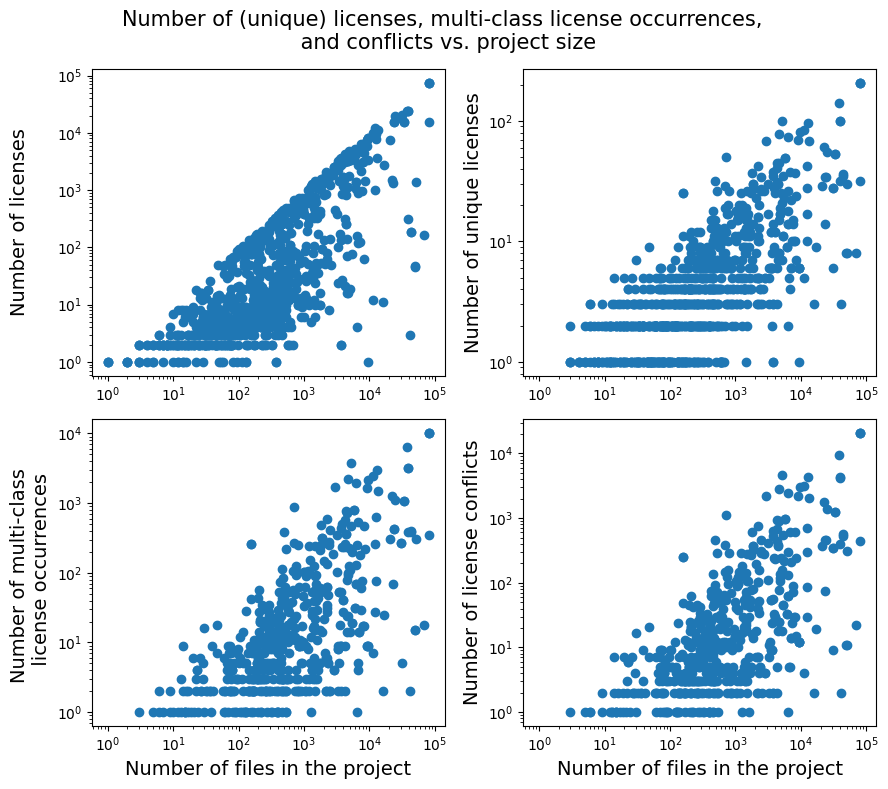

In [106]:
# UNIQUE
# now we visualize the above plots in a single figure
plt.clf()

fig, axs = plt.subplots(2, 2, figsize=(9, 8))

axs_size = 14
label_size = 10

# NUM LICENSES
axs[0][0].scatter(project_sizes, n_licenses)
# log x axis
axs[0][0].set_xscale('log')
# log y axis
axs[0][0].set_yscale('log')
#axs[0][0].set_xlabel('Number of files in the project')
axs[0][0].set_ylabel('Number of licenses\n')
# large fontsize y label
axs[0][0].xaxis.label.set_size(axs_size)
axs[0][0].yaxis.label.set_size(axs_size)
axs[0][0].tick_params(axis='both', which='major', labelsize=label_size)

# NUM UNIQUE LICENSES
axs[0][1].scatter(project_sizes, n_unique_licenses)
# set max y value
#axs[0][1].set_ylim([0, 200])

# log x axis
axs[0][1].set_xscale('log')
# log y axis
axs[0][1].set_yscale('log')
#axs[0][1].set_xlabel('Number of files in the project')
axs[0][1].set_ylabel('Number of unique licenses')
# large fontsize y label
axs[0][1].xaxis.label.set_size(axs_size)
axs[0][1].yaxis.label.set_size(axs_size)
axs[0][1].tick_params(axis='both', which='major', labelsize=label_size)

# NUM mismatches
axs[1][0].scatter(project_sizes, n_mismatches)
# log x axis
axs[1][0].set_xscale('log')
axs[1][0].set_yscale('log')
axs[1][0].set_xlabel('Number of files in the project')
axs[1][0].set_ylabel('Number of multi-class \n license occurrences')
axs[1][0].xaxis.label.set_size(axs_size)
axs[1][0].yaxis.label.set_size(axs_size)
axs[1][0].tick_params(axis='both', which='major', labelsize=label_size)

# NUM CONFLICTS
axs[1][1].scatter(project_sizes, n_conflicts)
# log x axis
axs[1][1].set_xscale('log')
axs[1][1].set_yscale('log')
axs[1][1].set_xlabel('Number of files in the project')
axs[1][1].set_ylabel('Number of license conflicts')
axs[1][1].xaxis.label.set_size(axs_size)
axs[1][1].yaxis.label.set_size(axs_size)
axs[1][1].tick_params(axis='both', which='major', labelsize=label_size)

fig.suptitle('Number of (unique) licenses, multi-class license occurrences, \n and conflicts vs. project size', fontsize=15)

fig.tight_layout() 
plt.savefig('number_of_licenses_mismatches_conflicts_vs_project_size_rev.png')

In [107]:
# pearson correlation coefficient between project size and number of licenses
print(np.corrcoef(project_sizes, n_licenses)[0, 1])

# spearman correlation coefficient between project size and number of licenses
print(scipy.stats.spearmanr(project_sizes, n_licenses))

# kendall correlation coefficient between project size and number of licenses
print(scipy.stats.kendalltau(project_sizes, n_licenses))

0.7481443944433622
SignificanceResult(statistic=0.7705056740728611, pvalue=7.558930900096575e-176)
SignificanceResult(statistic=0.5987718953940235, pvalue=7.333610693879924e-153)


In [65]:
# pearson correlation coefficient between project size and number of unique licenses
print(np.corrcoef(project_sizes, n_unique_licenses)[0, 1])

# spearman correlation coefficient between project size and number of unique licenses
print(scipy.stats.spearmanr(project_sizes, n_unique_licenses))

# kendall correlation coefficient between project size and number of unique licenses
print(scipy.stats.kendalltau(project_sizes, n_unique_licenses))

0.6761426798220687
SignificanceResult(statistic=0.7137559614561156, pvalue=1.7295116541592913e-139)
SignificanceResult(statistic=0.5471282889992769, pvalue=1.0228156304486945e-119)


In [110]:
# pearson correlation coefficient between project size and number of mismatches
print(np.corrcoef(project_sizes, n_mismatches)[0, 1])

# spearman correlation coefficient between project size and number of mismatches
print(scipy.stats.spearmanr(project_sizes, n_mismatches))

# kendall correlation coefficient between project size and number of mismatches
print(scipy.stats.kendalltau(project_sizes, n_mismatches))

#######################################################
print()

# pearson correlation coefficient between project size and number of mismatches (no 'unknown'/'unstated' classes)
print(np.corrcoef(project_sizes, no_uu_n_mismatches)[0, 1])

# spearman correlation coefficient between project size and number of mismatches (no 'unknown'/'unstated' classes)
print(scipy.stats.spearmanr(project_sizes, no_uu_n_mismatches))

# kendall correlation coefficient between project size and number of mismatches (no 'unknown'/'unstated' classes)
print(scipy.stats.kendalltau(project_sizes, no_uu_n_mismatches))

0.6544679171791988
SignificanceResult(statistic=0.6917932753465632, pvalue=1.045202788284777e-127)
SignificanceResult(statistic=0.5260139865507746, pvalue=1.3681470831227042e-107)

0.6565398170904075
SignificanceResult(statistic=0.6437064024295437, pvalue=2.7987378938605002e-105)
SignificanceResult(statistic=0.496966770221302, pvalue=5.2024251919060084e-92)


In [111]:
# pearson correlation coefficient between project size and number of conflicts
print(np.corrcoef(project_sizes, n_conflicts)[0, 1])

# spearman correlation coefficient between project size and number of conflicts
print(scipy.stats.spearmanr(project_sizes, n_conflicts))

# kendall correlation coefficient between project size and number of conflicts
print(scipy.stats.kendalltau(project_sizes, n_conflicts))

#######################################################
print()

# pearson correlation coefficient between project size and number of conflicts (no 'unknown'/'unstated' classes)
print(np.corrcoef(project_sizes, no_uu_n_conflicts)[0, 1])

# spearman correlation coefficient between project size and number of conflicts (no 'unknown'/'unstated' classes)
print(scipy.stats.spearmanr(project_sizes, no_uu_n_conflicts))

# kendall correlation coefficient between project size and number of conflicts (no 'unknown'/'unstated' classes)
print(scipy.stats.kendalltau(project_sizes, no_uu_n_conflicts))

0.6458414499025532
SignificanceResult(statistic=0.6970070517615765, pvalue=2.0865931917262323e-130)
SignificanceResult(statistic=0.531488120387068, pvalue=5.918217442829056e-110)

0.6297509414443149
SignificanceResult(statistic=0.6799098922818193, pvalue=9.171762144044613e-122)
SignificanceResult(statistic=0.5201820524900326, pvalue=4.362884954392669e-104)


### Most common license mismatches

In [112]:
def classify_mismatches(data, inconsistency_key):
    to_return = {}

    for i in range(len(data)):
        mismatches = data[i][inconsistency_key]
        #print(mismatches)

        for inconsistency, occurrence in mismatches.items():
        #     if inconsistency['_1'] == 'Public Domain' or inconsistency['_2'] == 'Public Domain':
        #         continue
            c1, c2 = inconsistency.split('_vs_')[0], inconsistency.split('_vs_')[1]

            key1 = c1 + '_vs_' + c2
            key2 = c2 + '_vs_' + c1

            if key1 in to_return:
                to_return[key1] += occurrence
            elif key2 in to_return:
                to_return[key2] += occurrence
            else:
                to_return[key1] = occurrence

    return to_return

In [113]:
def build_inconsistency_matrix(data, inconsistency_key, normalize=False):
    to_return = { 
        'Permissive_Copyleft_Limited' : 0, 
        'Permissive_Copyleft' : 0,
        'Permissive_Un': 0,
        'Permissive_Miscellanea': 0,
        'Copyleft_Limited_Copyleft': 0,
        'Copyleft_Limited_Un': 0,
        'Copyleft_Limited_Miscellanea': 0,
        'Copyleft_Un': 0,
        'Copyleft_Miscellanea': 0,
        'Un_Miscellanea': 0,
    }

    un = set(['Unknown', 'Unstated License'])

    tot_elem = 0

    for i in range(len(data)):
        mismatches = data[i][inconsistency_key]

        for inconsistency in mismatches:
            c1, c2 = inconsistency.split('_vs_')[0], inconsistency.split('_vs_')[1]

            # skip public domain
            if c1 == 'Public Domain' or c2 == 'Public Domain':
                continue

            tot_elem += 1

            # assign the inconsistency to the proper category
            is_permissive = c1 == 'Permissive' or c2 == 'Permissive'
            is_weak_copyleft = c1 == 'Copyleft Limited' or c2 == 'Copyleft Limited'
            is_strong_copyleft = c1 == 'Copyleft' or c2 == 'Copyleft'
            is_un = c1 in un or c2 in un

            if is_permissive:
                if is_weak_copyleft:
                    to_return['Permissive_Copyleft_Limited'] += 1
                elif is_strong_copyleft:
                    to_return['Permissive_Copyleft'] += 1
                elif is_un:
                    to_return['Permissive_Un'] += 1
                else:
                    to_return['Permissive_Miscellanea'] += 1
            elif is_weak_copyleft:
                if is_strong_copyleft:
                    to_return['Copyleft_Limited_Copyleft'] += 1
                elif is_un:
                    to_return['Copyleft_Limited_Un'] += 1
                else:
                    to_return['Copyleft_Limited_Miscellanea'] += 1
            elif is_strong_copyleft:
                if is_un:
                    to_return['Copyleft_Un'] += 1
                else:
                    to_return['Copyleft_Miscellanea'] += 1
            elif is_un:
                to_return['Un_Miscellanea'] += 1
            else:
                print('Error: inconsistency not assigned to any category: ' + c1 + '-' + c2)

    if normalize:
        for key in to_return:
            to_return[key] = (to_return[key] / tot_elem) * 100 

    return to_return

In [114]:
declared_mismatches = classify_mismatches(data_json, 'between_declared_mismatches')
incode_mismatches = classify_mismatches(data_json, 'between_incode_mismatches')
declared_incode_mismatches = classify_mismatches(data_json, 'between_declared_incode_mismatches')

In [115]:
declared_matrix = build_inconsistency_matrix(data_json, 'between_declared_mismatches', normalize=True)
declared_matrix

Error: inconsistency not assigned to any category: Source-available-CLA
Error: inconsistency not assigned to any category: Source-available-Commercial
Error: inconsistency not assigned to any category: Commercial-Proprietary Free


{'Permissive_Copyleft_Limited': 4.282115869017632,
 'Permissive_Copyleft': 10.075566750629724,
 'Permissive_Un': 38.287153652392945,
 'Permissive_Miscellanea': 8.312342569269521,
 'Copyleft_Limited_Copyleft': 2.770780856423174,
 'Copyleft_Limited_Un': 5.037783375314862,
 'Copyleft_Limited_Miscellanea': 1.2594458438287155,
 'Copyleft_Un': 13.602015113350127,
 'Copyleft_Miscellanea': 1.5113350125944585,
 'Un_Miscellanea': 14.105793450881613}

In [47]:
incode_matrix = build_inconsistency_matrix(data_json, 'between_incode_mismatches', normalize=True)
incode_matrix

Error: inconsistency not assigned to any category: Patent License-CLA
Error: inconsistency not assigned to any category: Commercial-Source-available
Error: inconsistency not assigned to any category: Commercial-CLA
Error: inconsistency not assigned to any category: Source-available-CLA
Error: inconsistency not assigned to any category: Source-available-Commercial
Error: inconsistency not assigned to any category: Commercial-Free Restricted
Error: inconsistency not assigned to any category: Commercial-CLA
Error: inconsistency not assigned to any category: Commercial-Proprietary Free
Error: inconsistency not assigned to any category: CLA-Proprietary Free
Error: inconsistency not assigned to any category: Proprietary Free-Commercial
Error: inconsistency not assigned to any category: CLA-Commercial
Error: inconsistency not assigned to any category: Commercial-Source-available
Error: inconsistency not assigned to any category: CLA-Commercial
Error: inconsistency not assigned to any category

{'Permissive_Copyleft_Limited': 6.640454346876365,
 'Permissive_Copyleft': 6.684141546526867,
 'Permissive_Un': 22.411533420707734,
 'Permissive_Miscellanea': 9.523809523809524,
 'Copyleft_Limited_Copyleft': 3.800786369593709,
 'Copyleft_Limited_Un': 9.436435124508519,
 'Copyleft_Limited_Miscellanea': 4.8055919615552645,
 'Copyleft_Un': 9.349060725207515,
 'Copyleft_Miscellanea': 4.412407164700743,
 'Un_Miscellanea': 19.615552643075578}

In [116]:
declared__incode_matrix = build_inconsistency_matrix(data_json, 'between_declared_incode_mismatches', normalize=True)
declared__incode_matrix

Error: inconsistency not assigned to any category: CLA-Patent License
Error: inconsistency not assigned to any category: Source-available-Commercial
Error: inconsistency not assigned to any category: Source-available-CLA
Error: inconsistency not assigned to any category: Source-available-Commercial
Error: inconsistency not assigned to any category: Source-available-Free Restricted
Error: inconsistency not assigned to any category: Proprietary Free-Commercial
Error: inconsistency not assigned to any category: Proprietary Free-CLA
Error: inconsistency not assigned to any category: CLA-Source-available
Error: inconsistency not assigned to any category: CLA-Commercial
Error: inconsistency not assigned to any category: Proprietary Free-CLA
Error: inconsistency not assigned to any category: Proprietary Free-Commercial
Error: inconsistency not assigned to any category: CLA-Source-available
Error: inconsistency not assigned to any category: CLA-Patent License
Error: inconsistency not assigned 

{'Permissive_Copyleft_Limited': 7.823529411764706,
 'Permissive_Copyleft': 8.117647058823529,
 'Permissive_Un': 27.764705882352942,
 'Permissive_Miscellanea': 12.294117647058824,
 'Copyleft_Limited_Copyleft': 3.176470588235294,
 'Copyleft_Limited_Un': 7.764705882352942,
 'Copyleft_Limited_Miscellanea': 2.2941176470588234,
 'Copyleft_Un': 9.529411764705882,
 'Copyleft_Miscellanea': 3.4705882352941178,
 'Un_Miscellanea': 16.235294117647058}

In [117]:
declared_mismatches_sorted = {k: v for k, v in sorted(declared_mismatches.items(), key=lambda item: item[1], reverse=True)}
declared_mismatches_sorted

{'Permissive_vs_Unknown': 877,
 'Copyleft_vs_Permissive': 155,
 'Permissive_vs_Copyleft Limited': 141,
 'Unknown_vs_Copyleft': 113,
 'Public Domain_vs_Permissive': 108,
 'Unknown_vs_Copyleft Limited': 103,
 'Permissive_vs_Unstated License': 73,
 'Permissive_vs_CLA': 63,
 'Unknown_vs_Public Domain': 63,
 'Unknown_vs_CLA': 58,
 'Unknown_vs_Unstated License': 52,
 'Copyleft_vs_Unstated License': 27,
 'Copyleft_vs_Copyleft Limited': 20,
 'Source-available_vs_Permissive': 19,
 'Unknown_vs_Source-available': 14,
 'Proprietary Free_vs_Permissive': 9,
 'Copyleft Limited_vs_Public Domain': 9,
 'CLA_vs_Unstated License': 8,
 'Patent License_vs_Permissive': 8,
 'Permissive_vs_Commercial': 7,
 'Unknown_vs_Commercial': 7,
 'Unknown_vs_Free Restricted': 6,
 'Copyleft Limited_vs_CLA': 6,
 'Patent License_vs_Unknown': 6,
 'Copyleft_vs_Public Domain': 5,
 'Copyleft_vs_CLA': 4,
 'Free Restricted_vs_Permissive': 3,
 'Copyleft Limited_vs_Commercial': 3,
 'Free Restricted_vs_Public Domain': 2,
 'Public Dom

In [50]:
sum(declared_mismatches.values())

1989

In [118]:
# merge the three dictionaries
all_mismatches = declared_mismatches.copy()
all_mismatches.update(incode_mismatches)
all_mismatches.update(declared_incode_mismatches)

all_mismatches

{'Permissive_vs_Unknown': 7011,
 'Permissive_vs_CLA': 315,
 'Permissive_vs_Unstated License': 931,
 'Unknown_vs_CLA': 248,
 'Unknown_vs_Unstated License': 1131,
 'CLA_vs_Unstated License': 48,
 'Copyleft_vs_Permissive': 1541,
 'Unknown_vs_Source-available': 93,
 'Unknown_vs_Copyleft': 7505,
 'Source-available_vs_Copyleft': 15,
 'Source-available_vs_Permissive': 107,
 'Permissive_vs_Commercial': 185,
 'Public Domain_vs_Permissive': 108,
 'Unknown_vs_Free Restricted': 20,
 'Unknown_vs_Public Domain': 654,
 'Free Restricted_vs_Public Domain': 6,
 'Free Restricted_vs_Permissive': 21,
 'Public Domain_vs_Source-available': 2,
 'Copyleft_vs_CLA': 35,
 'Copyleft_vs_Unstated License': 249,
 'Proprietary Free_vs_Permissive': 47,
 'Permissive_vs_Copyleft Limited': 1090,
 'Unknown_vs_Copyleft Limited': 1019,
 'Copyleft Limited_vs_Public Domain': 551,
 'Copyleft Limited_vs_CLA': 89,
 'Public Domain_vs_CLA': 64,
 'Patent License_vs_Permissive': 8,
 'Patent License_vs_Unknown': 6,
 'Patent License_vs

### Most common license conflicts

In [119]:
def classify_conflicts(data, conflict_key):
    to_return = {}

    for i in range(len(data)):
        conflicts = data[i][conflict_key]

        for conflict, occurrence in conflicts.items():
            # check if conflict['_1'] and conflict['_2'] are empty
            # if not conflict['_1'] or not conflict['_2']:
            #     continue

            c1, c2 = conflict.split('_vs_')[0], conflict.split('_vs_')[1]

            key1 = c1 + '_vs_' + c2
            key2 = c2 + '_vs_' + c1

            if key1 in to_return:
                to_return[key1] += occurrence
            elif key2 in to_return:
                to_return[key2] += occurrence
            else:
                to_return[key1] = occurrence
    return to_return

In [120]:
declared_conflicts = classify_conflicts(data_json, 'between_declared_conflicts')
incode_conflicts = classify_conflicts(data_json, 'between_incode_conflicts')
declared_incode_conflicts = classify_conflicts(data_json, 'between_declared_incode_conflicts')

possible_declared_conflicts = classify_conflicts(data_json, 'possible_between_declared_conflicts')
possible_incode_conflicts = classify_conflicts(data_json, 'possible_between_incode_conflicts')
possible_declared_incode_conflicts = classify_conflicts(data_json, 'possible_between_declared_incode_conflicts')

In [50]:
declared_conflicts;

In [121]:
# sum values of declared_conflicts
declared_conflicts_sum = 0
for key in declared_conflicts:
    declared_conflicts_sum += declared_conflicts[key]

# sum values of possible_declared_conflicts
possible_declared_conflicts_sum = 0
for key in possible_declared_conflicts:
    possible_declared_conflicts_sum += possible_declared_conflicts[key]

# sum values of incode_conflicts
incode_conflicts_sum = 0
for key in incode_conflicts:
    incode_conflicts_sum += incode_conflicts[key]

# sum values of possible_incode_conflicts
possible_incode_conflicts_sum = 0
for key in possible_incode_conflicts:
    possible_incode_conflicts_sum += possible_incode_conflicts[key]

# sum values of declared_incode_conflicts
declared_incode_conflicts_sum = 0
for key in declared_incode_conflicts:
    declared_incode_conflicts_sum += declared_incode_conflicts[key]

# sum values of possible_declared_incode_conflicts
possible_declared_incode_conflicts_sum = 0
for key in possible_declared_incode_conflicts:
    possible_declared_incode_conflicts_sum += possible_declared_incode_conflicts[key]

In [122]:
declared_conflicts_sum, incode_conflicts_sum, declared_incode_conflicts_sum

(1811, 64147, 17595)

In [123]:
possible_declared_conflicts_sum, possible_incode_conflicts_sum, possible_declared_incode_conflicts_sum

(554, 54357, 6521)

In [128]:
declared_conflicts_sorted = {k: v for k, v in sorted(declared_conflicts.items(), key=lambda item: item[1], reverse=True)}
declared_conflicts_sorted;

In [130]:
incode_conflicts_sorted = {k: v for k, v in sorted(incode_conflicts.items(), key=lambda item: item[1], reverse=True)}
incode_conflicts_sorted;

In [129]:
declared_incode_conflicts_sorted = {k: v for k, v in sorted(declared_incode_conflicts.items(), key=lambda item: item[1], reverse=True)}
declared_incode_conflicts_sorted;

In [133]:
# merge the three dictionaries
all_conflicts = declared_conflicts.copy()
# all_conflicts.update(incode_conflicts)
# all_conflicts.update(declared_incode_conflicts)
for k in incode_conflicts.keys():
    all_conflicts[k] = all_conflicts.get(k, 0) + incode_conflicts[k]
for k in declared_incode_conflicts.keys():
    all_conflicts[k] = all_conflicts.get(k, 0) + declared_incode_conflicts[k]

# sort the dictionary by value
all_conflicts = {k: v for k, v in sorted(all_conflicts.items(), key=lambda item: item[1], reverse=True)}
all_conflicts;

In [131]:
# some keys of the dict are repeated, so we need to merge them
all_conflicts_merged = {}

for key in all_conflicts:
    c1, c2 = key.split('_vs_')[0], key.split('_vs_')[1]

    key1 = c1 + '_vs_' + c2
    key2 = c2 + '_vs_' + c1

    if key1 in all_conflicts_merged:
        all_conflicts_merged[key1] += all_conflicts[key]
    elif key2 in all_conflicts_merged:
        all_conflicts_merged[key2] += all_conflicts[key]
    else:
        all_conflicts_merged[key1] = all_conflicts[key]

In [132]:
#sort the dictionary
all_conflicts_merged = {k: v for k, v in sorted(all_conflicts_merged.items(), key=lambda item: item[1], reverse=True)}
all_conflicts_merged

{'mit_vs_unknown-license-reference': 178,
 'apache-2.0_vs_unknown-license-reference': 163,
 'mit_vs_public-domain': 144,
 'generic-cla_vs_apache-2.0': 140,
 'gpl-2.0_vs_mit': 122,
 'gpl-3.0_vs_mit': 118,
 'free-unknown_vs_mit': 110,
 'apache-2.0_vs_public-domain': 107,
 'mit_vs_warranty-disclaimer': 99,
 'mit_vs_gpl-1.0-plus': 98,
 'gpl-3.0_vs_apache-2.0': 94,
 'mit_vs_proprietary-license': 93,
 'gpl-2.0_vs_apache-2.0': 91,
 'mit_vs_gpl-2.0-plus': 89,
 'apache-2.0_vs_proprietary-license': 88,
 'generic-cla_vs_mit': 88,
 'apache-2.0_vs_free-unknown': 81,
 'mit_vs_cc-by-4.0': 79,
 'ofl-1.1_vs_mit': 78,
 'apache-2.0_vs_gpl-1.0-plus': 77,
 'apache-2.0_vs_ofl-1.1': 76,
 'bsd-3-clause_vs_public-domain': 76,
 'gpl-2.0-plus_vs_gpl-2.0': 76,
 'gpl-2.0_vs_gpl-1.0-plus': 74,
 'apache-2.0_vs_warranty-disclaimer': 74,
 'cc-by-4.0_vs_apache-2.0': 71,
 'mit_vs_lgpl-2.1-plus': 70,
 'bsd-3-clause_vs_unknown-license-reference': 69,
 'apache-2.0_vs_gpl-2.0-plus': 67,
 'apache-2.0_vs_lgpl-2.1-plus': 65,
 